In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from shapely.geometry import Polygon, LineString
import osmnx as ox
import networkx as nx
from itertools import combinations, permutations
import geopandas as gpd
import folium
import time

import İstanbuldaKayboldum #This is a custom made module. To import, you have to have İstanbuldaKayboldum.py file.


# Optimal Route Calculation for Multi-Destination Journeys

In the era of advanced GPS and digital mapping systems, getting from one location to another has never been easier. Typically, these systems efficiently calculate the shortest or quickest route between two points. However, what if you have more than two destinations to visit? The task of determining the most efficient path through multiple points becomes more complex, often leading to time and fuel inefficiencies due to suboptimal routing.

Our project aims to bridge this gap by providing a solution for calculating the optimal route among multiple destinations. Unlike traditional GPS systems that only consider two points, our project utilizes sophisticated algorithms to analyze all permutations of routes among the given destinations, thereby computing the path with the minimum cumulative distance.

The algorithms are powered by network analysis libraries like NetworkX and OSMnx, leveraging real-world street network data from OpenStreetMap. These tools enable our system to understand the intricate structures of urban road networks and find the shortest path between any two points within it.

Moreover, our system goes beyond simply providing a list of locations in the order they should be visited. It uses the Folium library to create an interactive map, visualizing the entire route. The map clearly shows the path for each leg of the journey, with different colors indicating different segments. The start and end points of each segment are marked with icons, making it easy to understand the overall routing at a glance.

In summary, our project takes the utility of GPS systems to the next level, making multi-destination travel planning more efficient and intuitive. By providing both an optimal order of destinations and a detailed visual representation of the journey, we believe our system can serve a wide range of users - from logistics companies planning delivery routes to tourists planning sightseeing trips.

For this project we have define nine functions in **İstanbuldaKayboldum.py**:

- `take_5_districts`: This function accepts a list of Istanbul districts and asks the user to specify how many districts they want to include in the path calculation (up to a maximum of 5). It validates user inputs and calls the get_coordinates function to convert district names to geographical coordinates.

- `get_coordinates`: This function utilizes the geocoding ability of the osmnx library to convert district names into geographical coordinates (latitude, longitude). The district name is provided as an argument to the function.

- `find_shortest_paths_return_routes`: This function computes all possible paths between the selected districts and identifies the shortest path. It uses the calculate_distance function to compute the distance between each pair of districts. It returns the shortest route and the LineString objects for all paths.

- `return_map_info`: This function prepares the necessary data to draw the final map. It collects the latitude and longitude of the selected districts and calculates the limits for the map. It also prepares the LineString objects to be drawn on the map by matching the shortest route with the LineString objects previously calculated.

- `calculate_distance`: This function accepts a graph of Istanbul's road network (G), and the start and end points for the path calculation. It identifies the nearest nodes to the start and end points on the graph and computes the shortest path between these nodes using Dijkstra's algorithm from the networkx library. It converts the resulting path, which is a list of nodes, into a LineString object and also calculates the length of the path.

- `draw_districts`: This function is designed to create the final map visualization. It generates a plot where it overlays the shortest path lines on the district map of Istanbul. It accepts as inputs the districts to be drawn, the limits for x and y axes (longitude and latitude), a dictionary of district coordinates, and the LineString objects representing the shortest paths.

The functions above have no use by their own. Rest of the functions are used to visualize the maps.

-  `print_istanbul_map_initilize_G`: This function visualizes the districts of Istanbul and loads the road network data for the city. 

- `ShortestPathBetweenIstanbulDistricts`: This function is essentially the main function that encapsulates all the steps necessary to compute the shortest path between selected Istanbul districts and generate a corresponding map. It accepts two arguments: districts and sorted_districts.

- `folium_map`: function computes the shortest route among a list of addresses and visualizes the route on a map using the Folium library.

The usage of the functions is as follows:

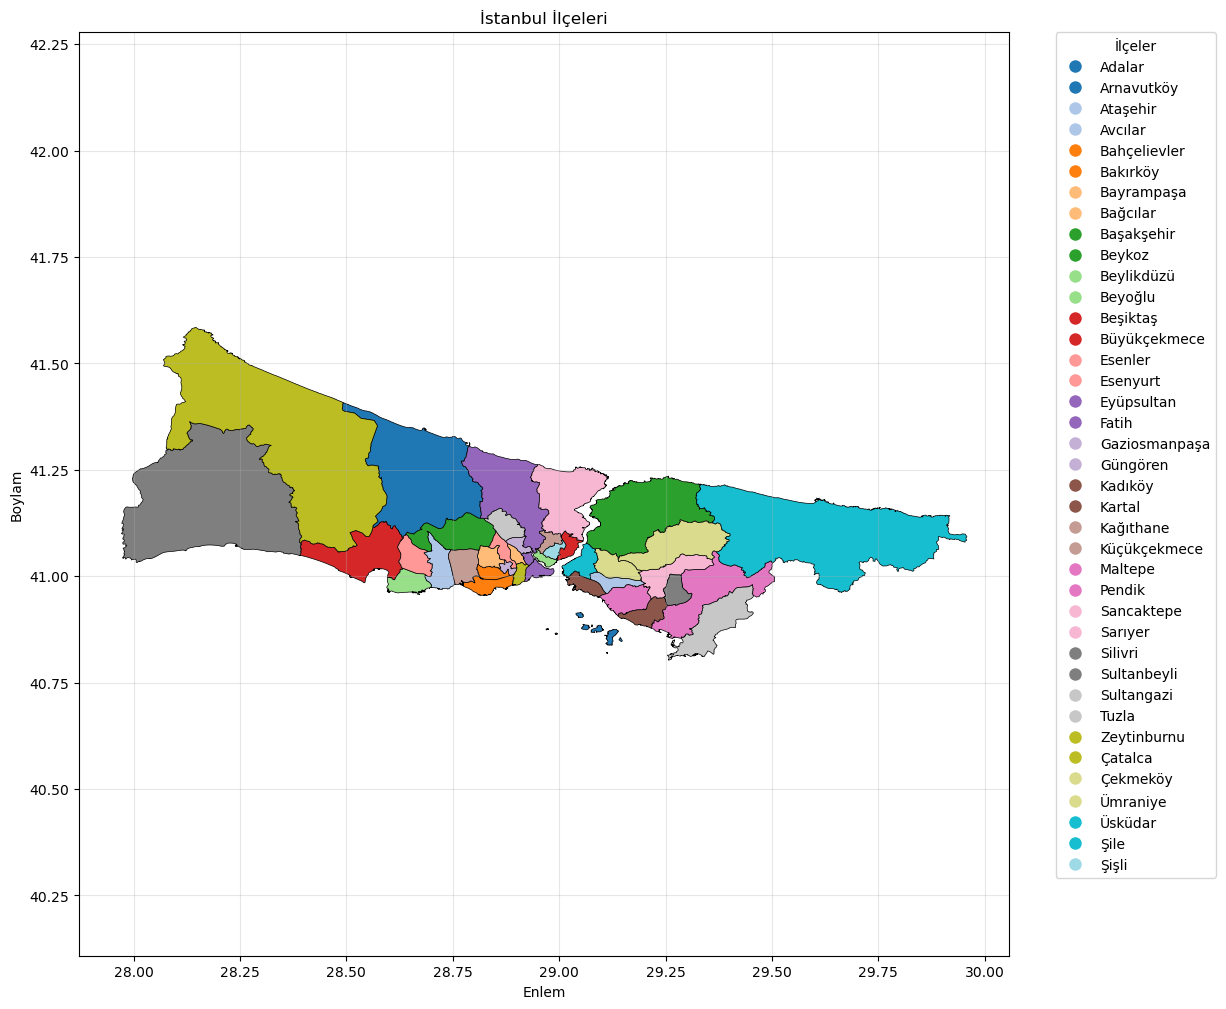

Program başlatılıyor...
Harita yüklendi!
Harita yüklenme süresi: 110.43 saniye


In [2]:
istanbul_districts = gpd.read_file("istanbul-districts.json")
# This step is necessary to use the rest of the functions.
G, districtNames = İstanbuldaKayboldum.print_istanbul_map_initilize_G(istanbul_districts)

Program en fazla 5 ilçe üzerinden hesaplama yapabilmektedir. 1 ile 5 arasında bir değer giriniz.

Kaç ilçe görüntülemek istiyorsunuz? 3
Lütfen 1. ilçenin adını girin: Kağıthane
Lütfen 2. ilçenin adını girin: Şişli
Lütfen 3. ilçenin adını girin: Büyükçekmece


Mesafeler hesaplanıyor...

Kağıthane ile Şişli arasındaki en kısa mesafe:
3.42 KM

Kağıthane ile Büyükçekmece arasındaki en kısa mesafe:
39.39 KM

Şişli ile Büyükçekmece arasındaki en kısa mesafe:
41.21 KM


En kısa rota: ('Şişli', 'Kağıthane', 'Büyükçekmece'), Toplam mesafe: 42.81


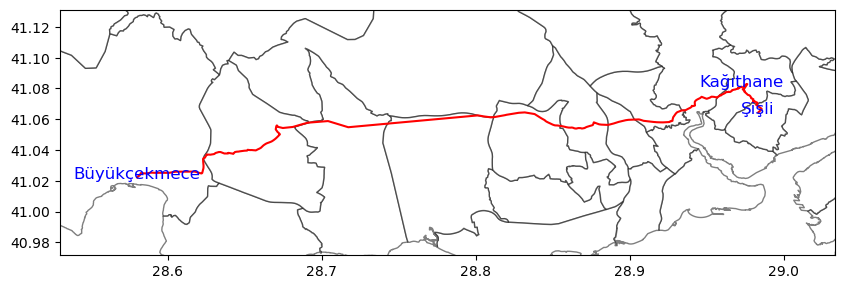

In [3]:
İstanbuldaKayboldum.ShortestPathBetweenIstanbulDistricts(G, istanbul_districts, districtNames)

We also created another module that visualizes the route using Folium. In this module, we enter addresses instead of counties.

In [4]:
#Adresses used in this function has to be present in the OSMnx Module.
addresses = ["Sapphire, Kağıthane, İstanbul", "İçmeler, Tuzla, İstanbul", "Cendere Caddesi, Kağıthane, İstanbul", 
             "Sabiha Gökçen Havalimanı, İstanbul", "Arnavutköy, İstanbul"]
İstanbuldaKayboldum.folium_map(G, addresses)

En kısa rota:
------
Sabiha Gökçen Havalimanı ile İçmeler, Tuzla arasındaki en kısa mesafe: 
9.7 KM

İçmeler, Tuzla ile Arnavutköy arasındaki en kısa mesafe: 
40.23 KM

Arnavutköy ile Sapphire, Kağıthane arasındaki en kısa mesafe: 
4.57 KM

Sapphire, Kağıthane ile Cendere Caddesi, Kağıthane arasındaki en kısa mesafe: 
3.87 KM

---------------------------------------------------
Toplam mesafe: 58.36 km
---------------------------------------------------
100 km/h hızla ortalama seyahat süresi: 35.02 mins
---------------------
Harita yüklenme süresi: 167.36 saniye
